In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('hotel_booking.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [3]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [4]:
df.shape

(119390, 32)

In [5]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df.drop_duplicates(inplace = True)
# total rows =119390, Duplicate rows =31994

uni_rows = df.shape[0]
uni_rows

# now unique rows = 87396

87396

In [9]:
# view unique data
df.reset_index()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-01-07
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-01-07
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-02-07
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-02-07
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,119385,City Hotel,0,23,2017,August,35,30,2,5,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-06-09
87392,119386,City Hotel,0,102,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-07-09
87393,119387,City Hotel,0,34,2017,August,35,31,2,5,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-07-09
87394,119388,City Hotel,0,109,2017,August,35,31,2,5,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-07-09


In [10]:
for i in df.describe(include='object').columns:
    print(i)
    print(df[i].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [11]:
# checking missing values 
missing = df.isnull().sum().sort_values(ascending = False)
missing

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


# Missing Values Treatment


In [12]:
missing[:4]

company     82137
agent       12193
country       452
children        4
dtype: int64

In [13]:
# checking percentage of null values in comapny column

perc_company_null = missing[0]/uni_rows*100
perc_company_null

93.98256213098998

In [14]:
# better to drop column beacsue large number of null values

df.drop(['company'],axis=1, inplace= True)

In [15]:
# check null values in agent 

perc_agent_null = missing[1]/uni_rows*100
perc_agent_null

13.951439425145315

In [16]:
# fill missing values of agent column with mode

df['agent'] = df['agent'].fillna(df['agent'].mode(), inplace=True)

In [17]:
# check the values in agent column

df3 = df['agent'].value_counts().reset_index()
df3.columns = ['agent', 'count']
print (df3)

Empty DataFrame
Columns: [agent, count]
Index: []


In [18]:
# drop the agent column as seen it is not any useful values

df.drop(['agent'] , axis=1, inplace=True)

In [19]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [20]:
# replace missing values of country and childre column with others and 0.

df['country'].fillna(value='others',inplace =True)
df['children'].fillna(value=0, inplace=True)

In [21]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [22]:
# for information we will add columns with total guests for clerification

df['Total_guests'] = df['adults']+ df['children']+df['babies']
df['Total_guests'].sum()

176999.0

In [59]:
df['meal'].replace("undefined","SC", inplace=True)

In [60]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

# Outliers detection and Treatment

In [23]:
df.select_dtypes(include=['int64','float64','Int64']).dtypes

is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
Total_guests                      float64
dtype: object

In [24]:
## segregating variables into groups

customers_staying_details=['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                     'stays_in_weekend_nights','stays_in_week_nights']
bookings_details =['previous_cancellations','previous_bookings_not_canceled',
                   'booking_changes','days_in_waiting_list']
others =['Total_guests','lead_time','total_of_special_requests','required_car_parking_spaces']
adr=['adr']

<AxesSubplot:xlabel='adr'>

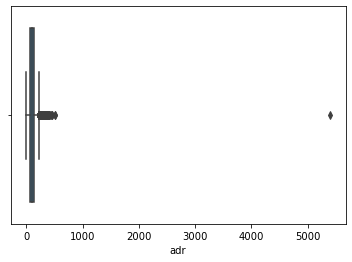

In [25]:
sns.boxplot(df['adr'])

In [26]:
def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data=data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data=data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True


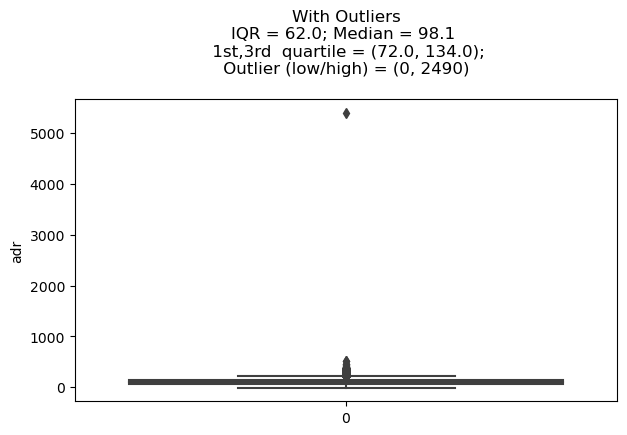

In [27]:
UVA_outlier(df,adr)

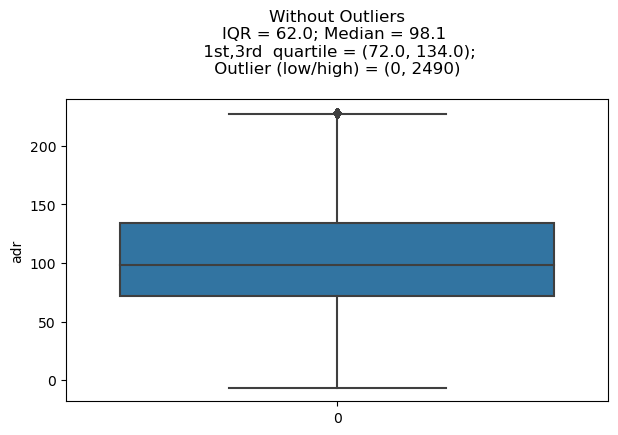

In [28]:
UVA_outlier(df,adr, include_outlier=False)

## Outlier Treatment using Custom function by replaced the Outlier values with whishker values(for high +1, and low -1).

True
True
True
True


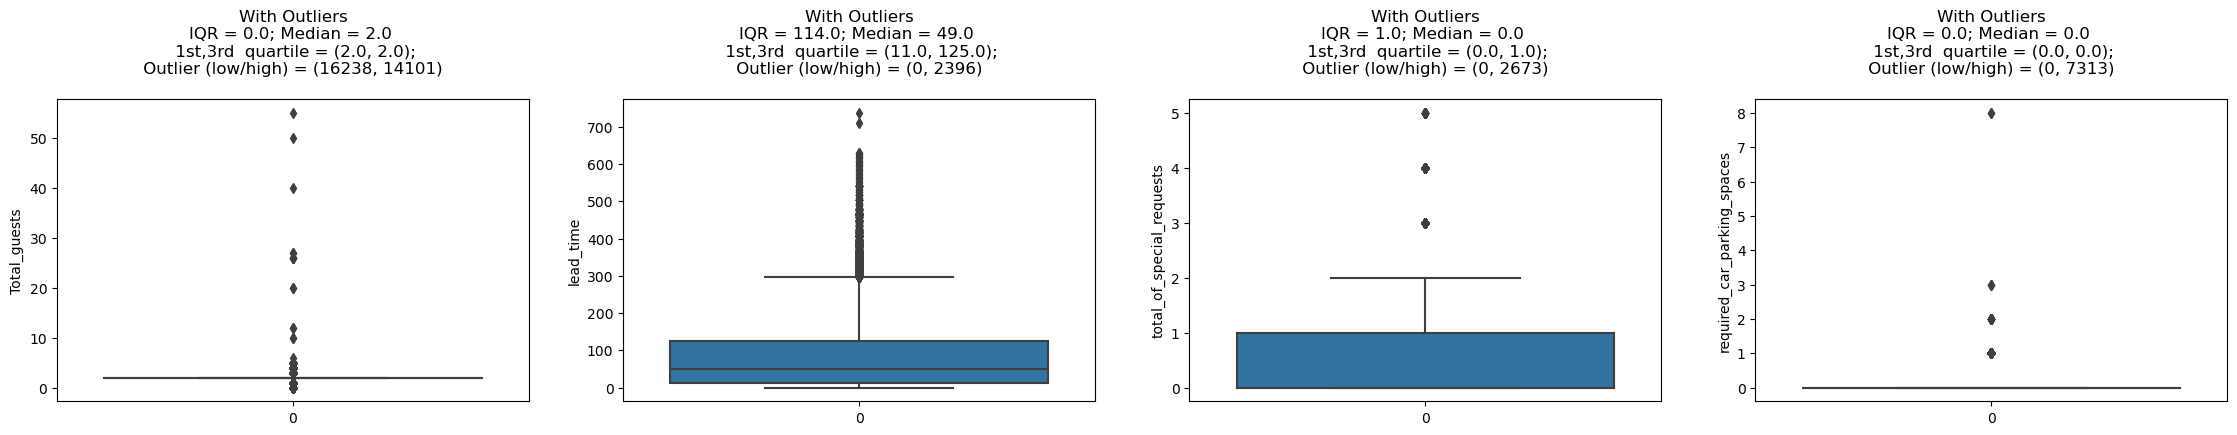

In [51]:
UVA_outlier(df,others)

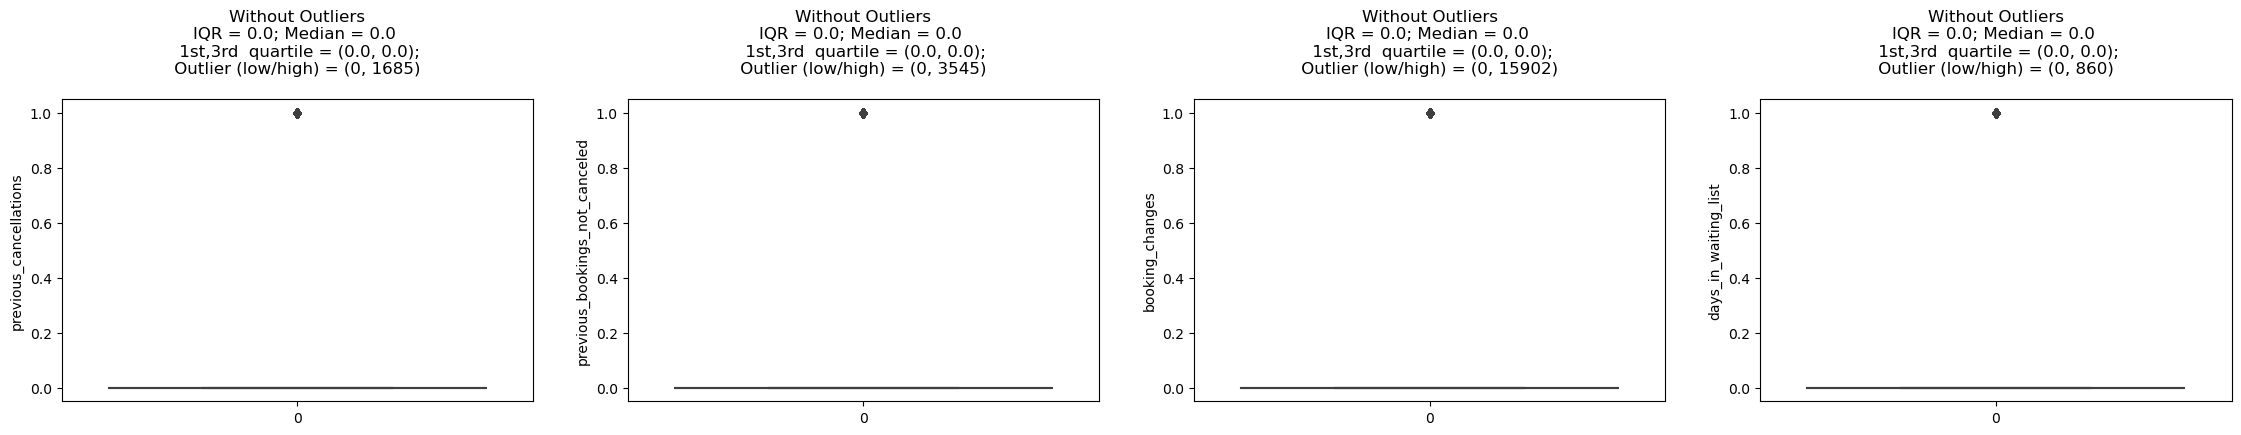

In [52]:
UVA_outlier(df,bookings_details,include_outlier=False)

# Data Analysis using Visualization

0    0.725102
1    0.274898
Name: is_canceled, dtype: float64


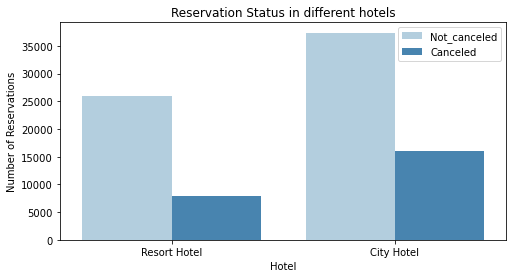

In [31]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)
plt.figure(figsize=(8,4))
ax1 = sns.countplot(x='hotel',hue='is_canceled',data=df,palette='Blues')
legend_labels_=ax1.get_legend_handles_labels()

plt.title('Reservation Status in different hotels')
plt.xlabel('Hotel')
plt.ylabel('Number of Reservations')
plt.legend(['Not_canceled','Canceled'])
plt.show()

In [32]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Total_guests'],
      dtype='object')

In [33]:
## individually checking resort hotel values 

resort_hotel = df[df['hotel'] =='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.765191
1    0.234809
Name: is_canceled, dtype: float64

In [34]:
#### individually checking resort hotel values 

city_hotel = df[df['hotel'] =='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.699614
1    0.300386
Name: is_canceled, dtype: float64

## Resort hotel has comparatively more cancellation than city hotel.

In [35]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean

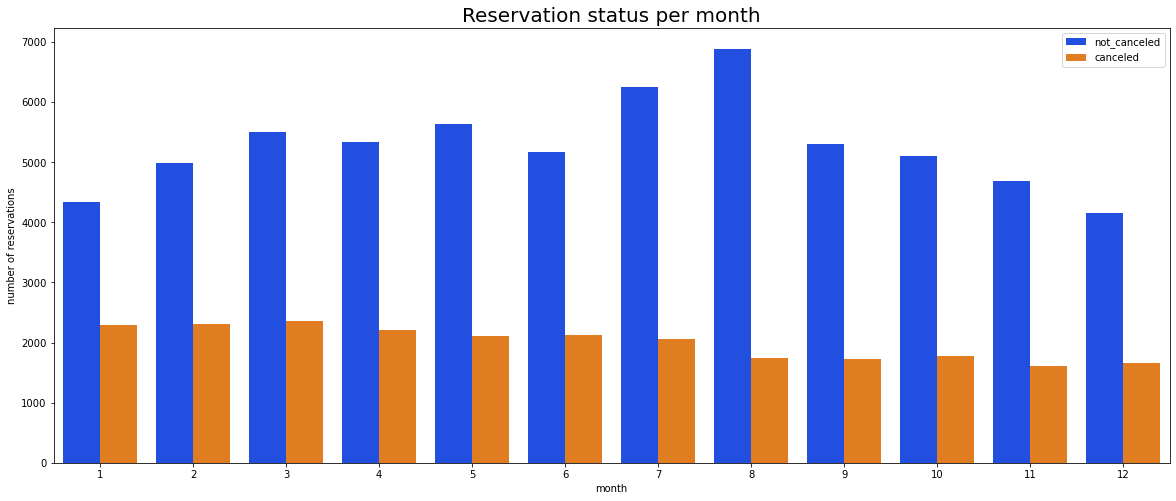

In [36]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize =(20,8))
ax1 = sns.countplot(x='month', hue='is_canceled',data=df,palette='bright')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month', size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not_canceled','canceled'])
plt.show()

## August month has maximum number of non cancelled bookings and less number of cancellations also.
## January Month has less number of non cancelled bookings and number of cancellation comparatively more.

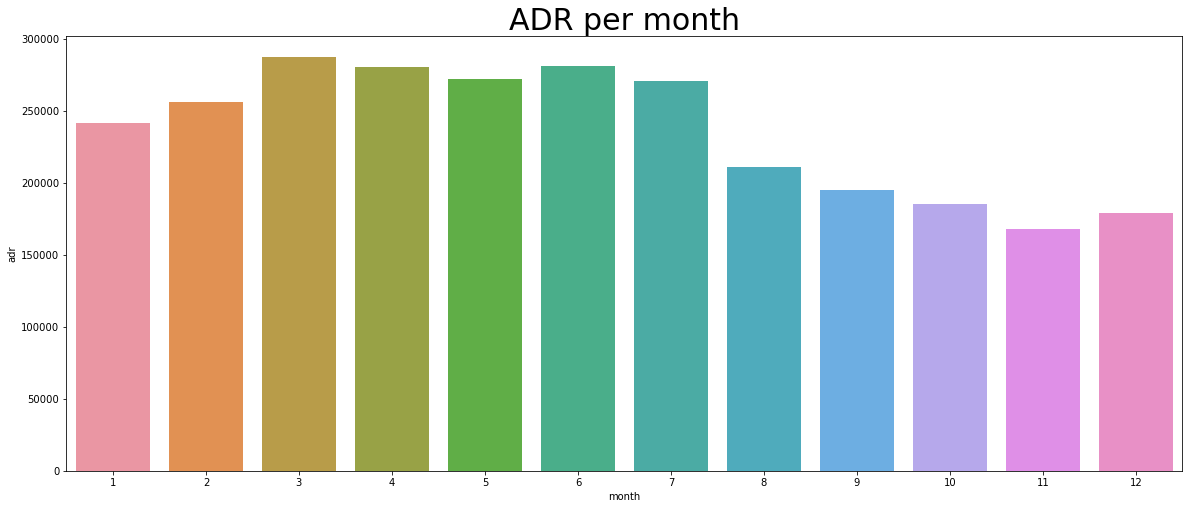

In [37]:
plt.figure(figsize=(20,8))
plt.title('ADR per month', fontsize=30)
sns.barplot('month','adr',data=df[df['is_canceled']== 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

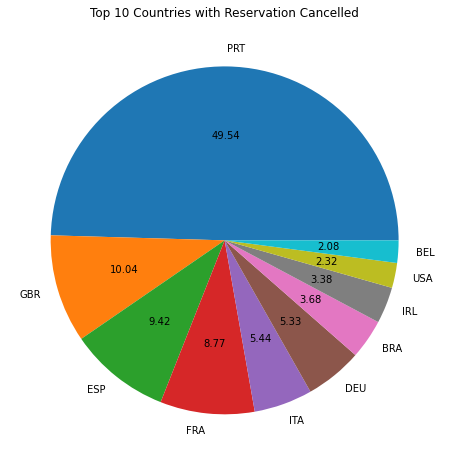

In [38]:
cancelled_data = df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10 Countries with Reservation Cancelled')
plt.pie(top_10_country,autopct='%.2f', labels=top_10_country.index)
plt.show()

## top 10 countries with cancelllation

## portugal has maximum no of cancellation then  at 2nd place Great Britain.

In [40]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.590622
Offline TA/TO    0.158920
Direct           0.135063
Groups           0.056547
Corporate        0.048194
Complementary    0.008032
Aviation         0.002597
Undefined        0.000023
Name: market_segment, dtype: float64

In [41]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.759417
Offline TA/TO    0.085869
Direct           0.072300
Groups           0.055567
Corporate        0.021228
Complementary    0.003663
Aviation         0.001873
Undefined        0.000083
Name: market_segment, dtype: float64

In [42]:
not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_data['market_segment'].value_counts(normalize=True)


Online TA        0.526629
Offline TA/TO    0.186615
Direct           0.158858
Corporate        0.058418
Groups           0.056919
Complementary    0.009689
Aviation         0.002872
Name: market_segment, dtype: float64

## AS maximum booking from online Travel agent also maximum cancellation is from online travel agent. 
## Then at 2nd place offline TA/TO after this same maximum booking and cancellation respectively. 

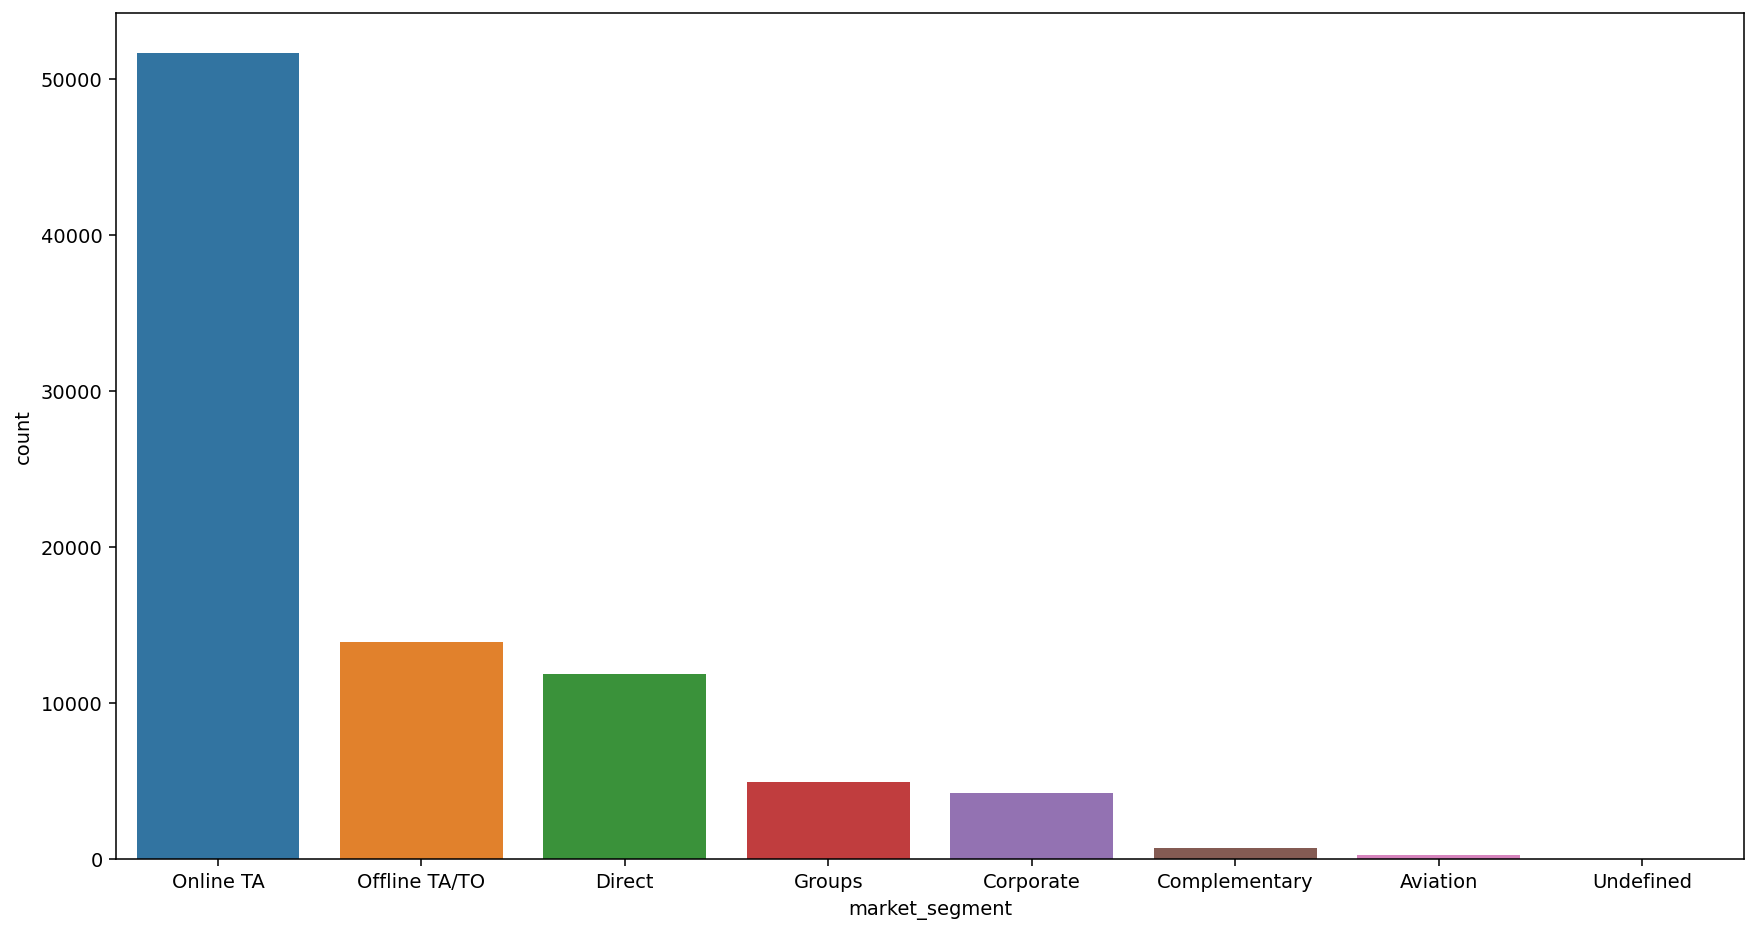

In [43]:
plt.figure(figsize=(15,8),dpi=140)
ax = sns.countplot(x=df['market_segment'],
                   order=df['market_segment'].value_counts(ascending=False).index);

abs_values = df['market_segment'].value_counts(ascending=False).values
plt.show()



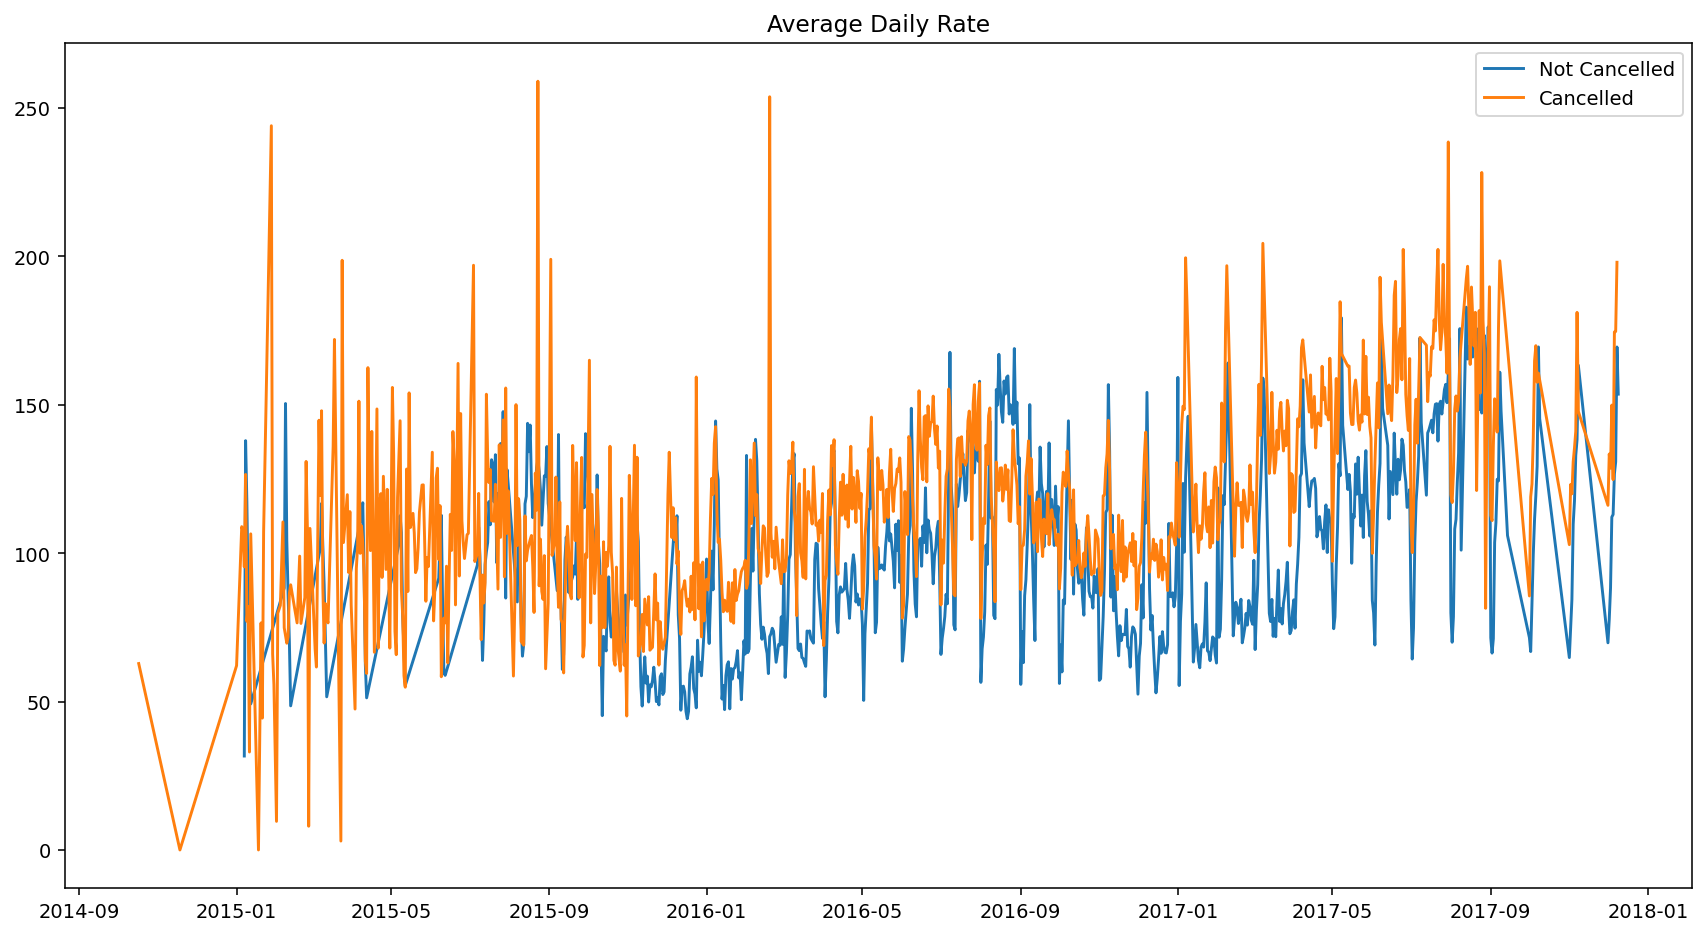

In [44]:
cancelled_data_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace=True)
cancelled_data_adr.sort_values('reservation_status_date',inplace=True)

not_cancelled_data_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_data_adr.reset_index(inplace=True)
not_cancelled_data_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(15,8),dpi=140)
plt.title('Average Daily Rate')
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'],label='Not Cancelled')
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'],label='Cancelled')
plt.legend()
plt.show()

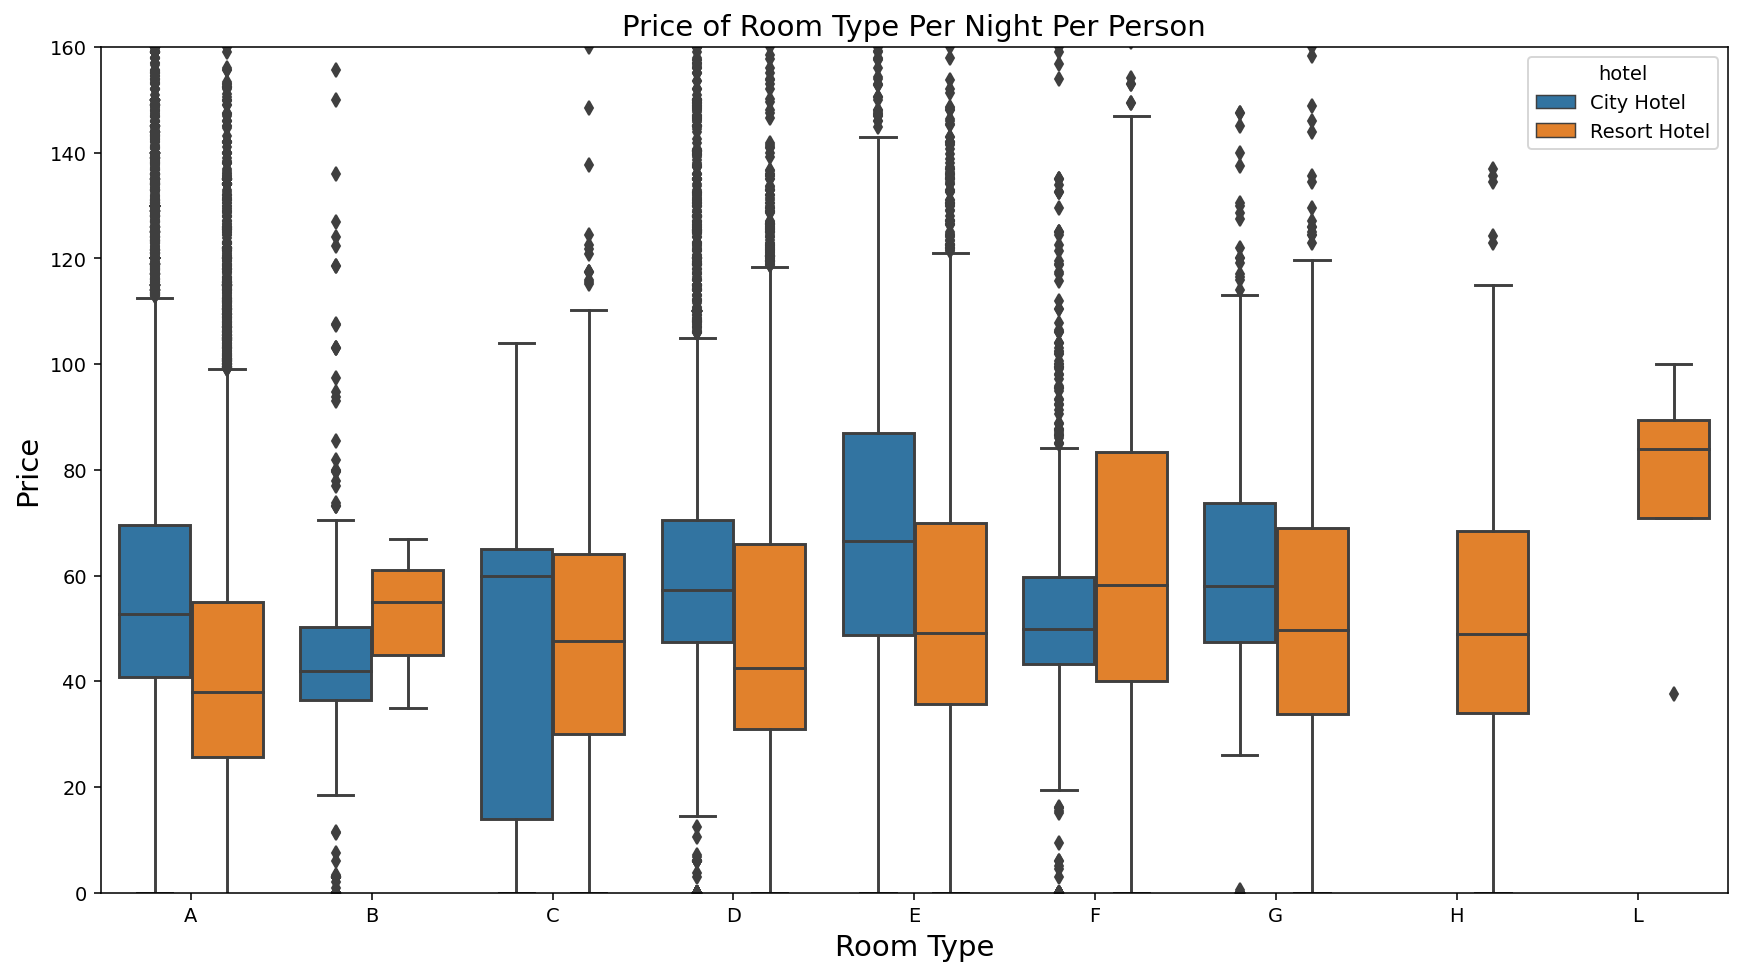

In [46]:
df['adr_updated'] = df['adr']/df['Total_guests']
valid_guests =df.loc[df['is_canceled']==0]
prices = valid_guests[['hotel','reserved_room_type','adr_updated']].sort_values('reserved_room_type')

plt.figure(figsize=(15,8),dpi=140)
sns.boxplot(x='reserved_room_type',
           y='adr_updated',
           hue='hotel',
            data=prices)
plt.title('Price of Room Type Per Night Per Person',fontsize=15)
plt.xlabel('Room Type', fontsize=15)
plt.ylabel('Price' , fontsize=15)
plt.ylim(0,160)
plt.show()

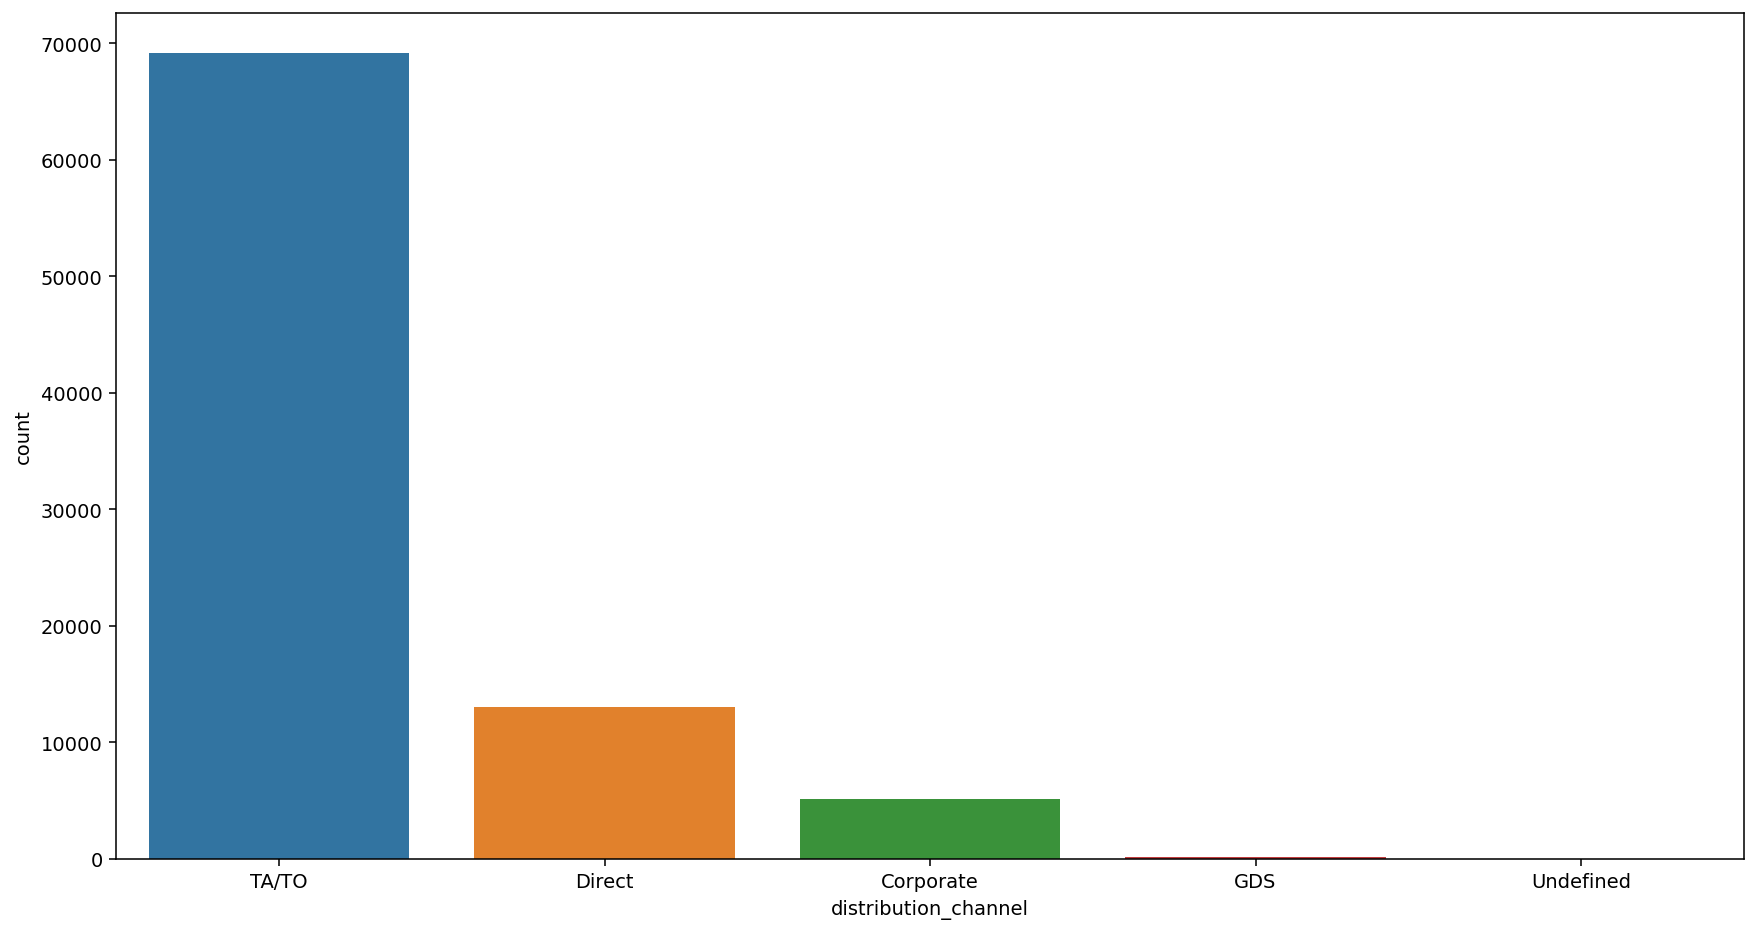

In [50]:
plt.figure(figsize=(15,8),dpi=140)
ax = sns.countplot(x=df['distribution_channel'],
                   order=df['distribution_channel'].value_counts(ascending=False).index);

plt.show()

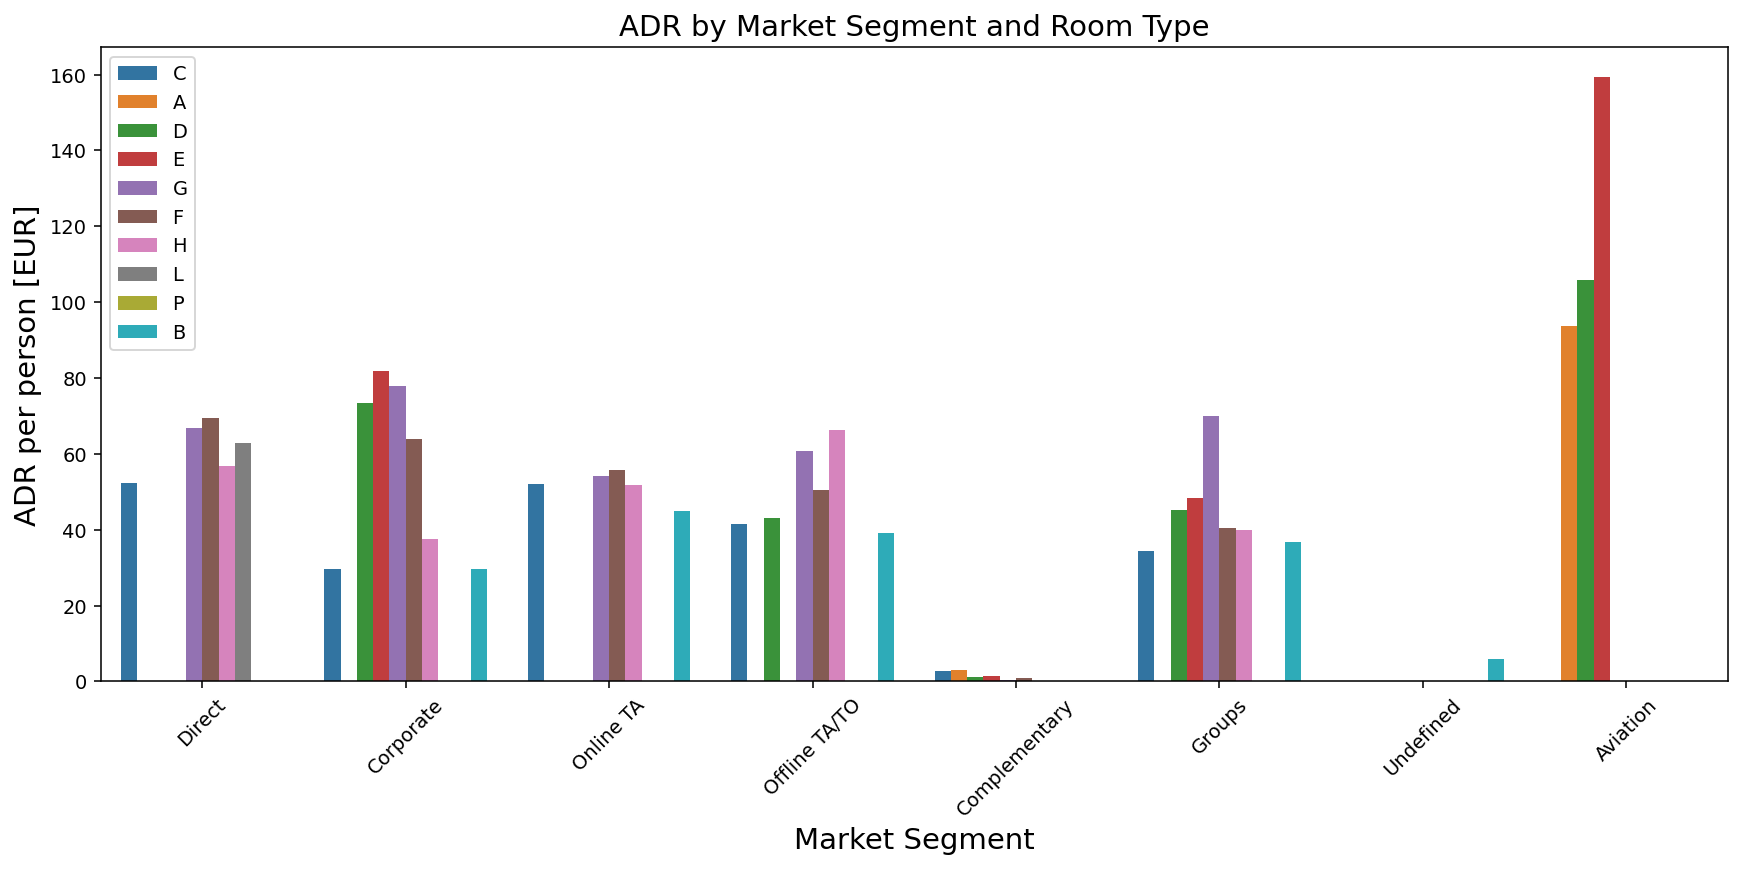

In [53]:
plt.figure(figsize=(15,6),dpi=140)
sns.barplot(x='market_segment',
           y='adr_updated',
           hue='reserved_room_type',
           data=df, ci= None)
plt.title('ADR by Market Segment and Room Type', fontsize=15)
plt.xlabel('Market Segment',fontsize=15)
plt.xticks(rotation=45)
plt.ylabel('ADR per person [EUR]',Fontsize=15)
plt.legend(loc='upper left')
plt.show()

## it is mix response for Room type by market segement and adr
## has seen from visual that Room type E & D & A has with max adr from aviation.
## In corporate also room type E is max. 
## In online TA Room type F is max.